# Subqueries


## Subquery 1

_Using the Northwind\_2023 database:_  

Create a list of products (return ProductName, and UnitPrice) where the Unitprice is greater than the average of all products.

_Results:_

Note: Image only shows a subset of returned rows.

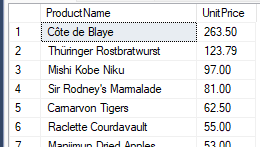

### Create the WHERE Clause

Create the aggregate value to filter the details on.

In [3]:
/* Code Here, use as many code blocks as required */

USE Northwind_2023;
GO

--Create my WHERE filter...
SELECT AVG(UnitPrice) as 'AvgUnitPrice' FROM dbo.Products



Commands completed successfully.

(1 row affected)

Total execution time: 00:00:00.006

AvgUnitPrice
28.8663


In [4]:
USE Northwind_2023;
GO

SELECT ProductName
	  ,UnitPrice
FROM dbo.Products
WHERE UnitPrice > (SELECT AVG(UnitPrice) FROM dbo.Products)
ORDER BY UnitPrice DESC
;

Commands completed successfully.

(25 rows affected)

Total execution time: 00:00:00.007

ProductName,UnitPrice
Côte de Blaye,263.50
Thüringer Rostbratwurst,123.79
Mishi Kobe Niku,97.00
Sir Rodney's Marmalade,81.00
Carnarvon Tigers,62.50
Raclette Courdavault,55.00
Manjimup Dried Apples,53.00
Tarte au sucre,49.30
Ipoh Coffee,46.00
Rössle Sauerkraut,45.60


## Subquery 2

_Using the Northwind\_2023 database:_  

Return the average freight charges from most to least for the five countries with the highest freight charges. This query will only return the data for the last year. The "last year" is determined by using the latest order date in the Orders table.

_Results:_

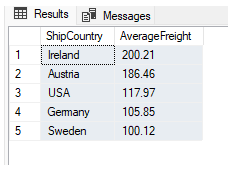

In [2]:
USE Northwind_2023;
GO

SELECT TOP 5 WITH TIES ShipCountry
      ,round(AVG(Freight),2) as 'AvgFreight'
FROM dbo.Orders
WHERE OrderDate > (SELECT DATEADD(yy,-1, (SELECT MAX(OrderDate)FROM dbo.Orders)))
GROUP BY ShipCountry
ORDER BY AvgFreight DESC
; -- 21 countries total


Commands completed successfully.

(5 rows affected)

Total execution time: 00:00:00.091

ShipCountry,AvgFreight
Ireland,200.21
Austria,186.46
USA,119.30
Germany,105.85
Sweden,100.12


In [3]:
USE Northwind_2023;
GO

SELECT TOP 5 WITH TIES cust.Country as 'CustomerCountry'
      ,round(AVG(ord.Freight),2) as 'AvgFreight'
FROM dbo.Orders ord
	INNER JOIN dbo.Customers cust
	ON ord.CustomerID = cust.CustomerID
WHERE ord.OrderDate > (SELECT DATEADD(yy,-1, (SELECT MAX(OrderDate)FROM dbo.Orders)))
GROUP BY cust.Country
ORDER BY AvgFreight DESC
; -- 21 countries total

Commands completed successfully.

(5 rows affected)

Total execution time: 00:00:00.019

CustomerCountry,AvgFreight
Ireland,200.21
Austria,186.46
USA,119.30
Germany,105.85
Sweden,100.12
